# seaborn

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats,integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord,'distributions')))

In [3]:
import datetime
import matplotlib.dates as mpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
from matplotlib import gridspec
from pandas import DataFrame
from pandas import Series
import warnings

warnings.filterwarnings('ignore')

## 灰度图

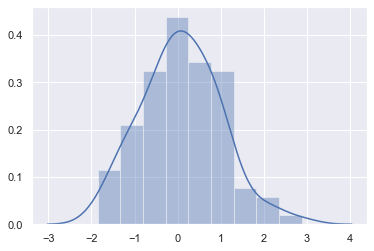

In [4]:
x=np.random.normal(size=100)
sns.distplot(x,kde=True)

#kde是密度曲线

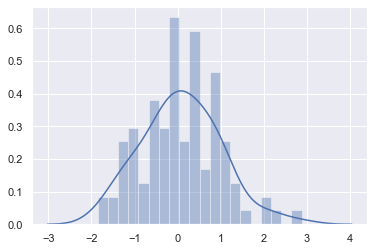

In [5]:
sns.distplot(x,kde=True,bins=20)

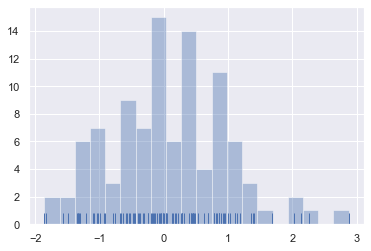

In [6]:
sns.distplot(x,kde=False,bins=20,rug=True)

#rug显示实例的位置，告诉我们如何去设置bins

## 核密度估计

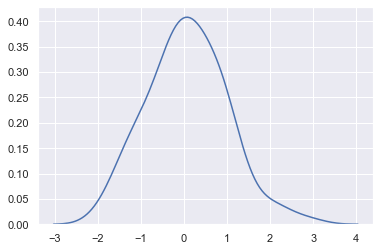

In [7]:
sns.kdeplot(x)

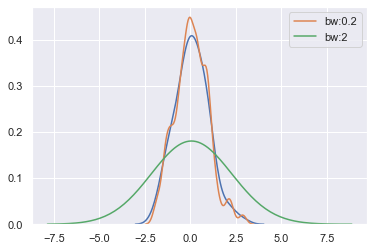

In [8]:
sns.kdeplot(x)
sns.kdeplot(x,bw=.2,label='bw:0.2')
sns.kdeplot(x,bw=2,label='bw:2')
plt.legend()


## 模型参数拟合

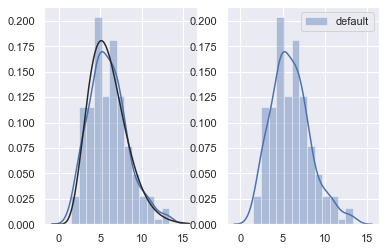

In [9]:
x=np.random.gamma(6,size=200)
plt.subplot(1,2,1)
sns.distplot(x,fit=stats.gamma,label='gamma')
plt.subplot(1,2,2)
sns.distplot(x,label='default')
plt.legend()

## 散点图

In [10]:
mean,cov=[0,1],[(1,.5),(.5,1)]

In [11]:
data=np.random.multivariate_normal(mean,cov,200)
df=pd.DataFrame(data,columns=['x','y'])

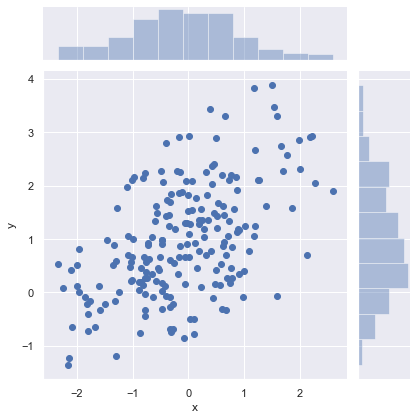

In [12]:
sns.jointplot(x='x',y='y',data=df)

## 六角箱图

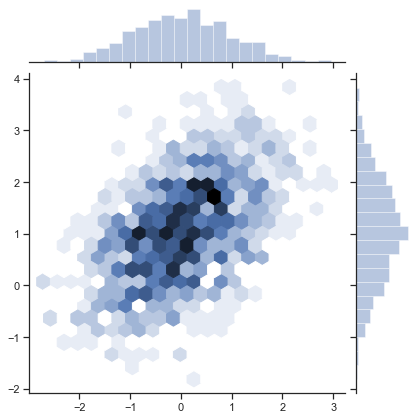

In [13]:
x,y=np.random.multivariate_normal(mean,cov,1000).T
with sns.axes_style('ticks'):
    sns.jointplot(x=x,y=y,kind='hex')

## 核密度估计

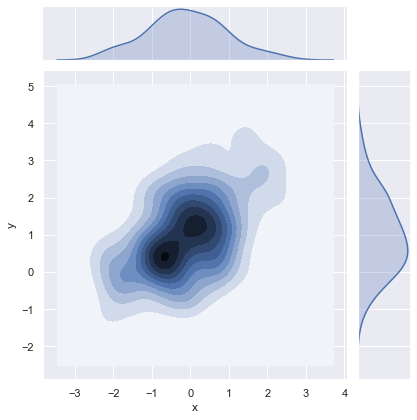

In [14]:
sns.jointplot(x='x',y='y',data=df,kind='kde')

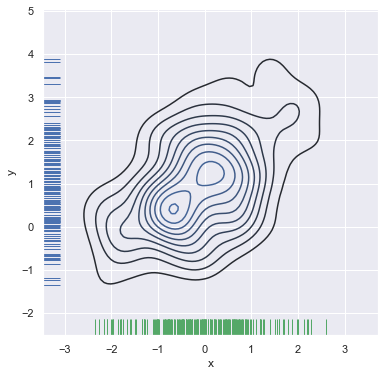

In [15]:
f,ax=plt.subplots(figsize=(6,6))
sns.kdeplot(df.x,df.y,ax=ax)
sns.rugplot(df.x,color='g',ax=ax)
sns.rugplot(df.y,vertical=True,ax=ax)


#样本大的时候不推荐rug

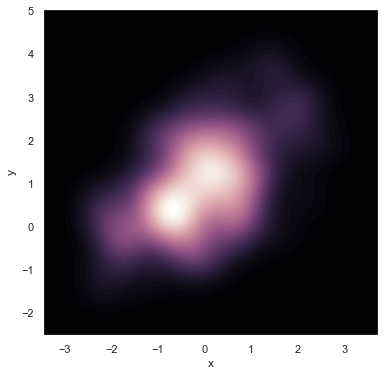

In [16]:
f,ax=plt.subplots(figsize=(6,6))
cmap=sns.cubehelix_palette(as_cmap=True,dark=1,light=0)
sns.kdeplot(df.x,df.y,cmap=cmap,n_levels=60,shade=True)

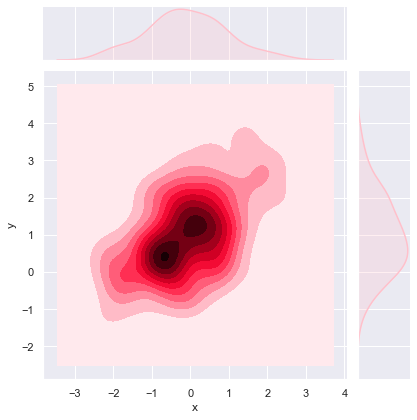

In [17]:
g=sns.jointplot(x='x',y='y',data=df,kind='kde',color='pink')

## 两两关系

In [18]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


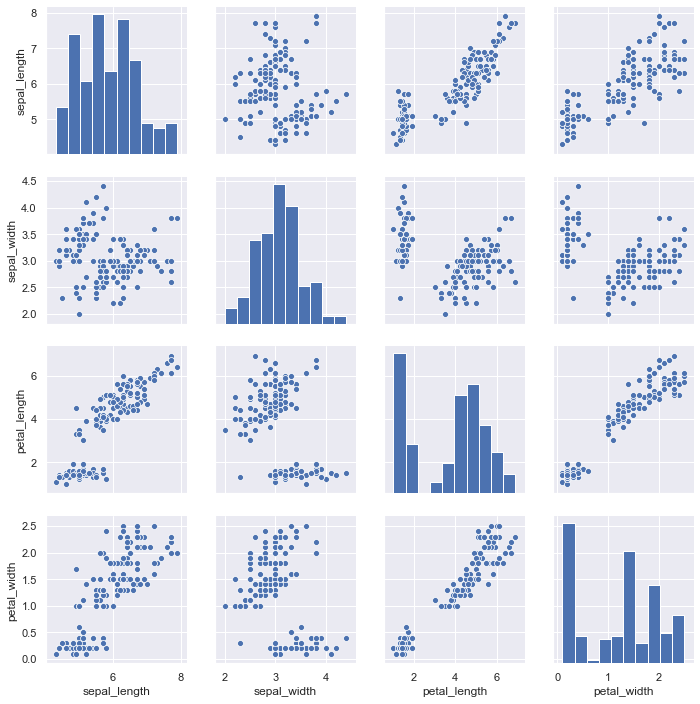

In [19]:
sns.pairplot(iris)

#维度太多的时候图会很小

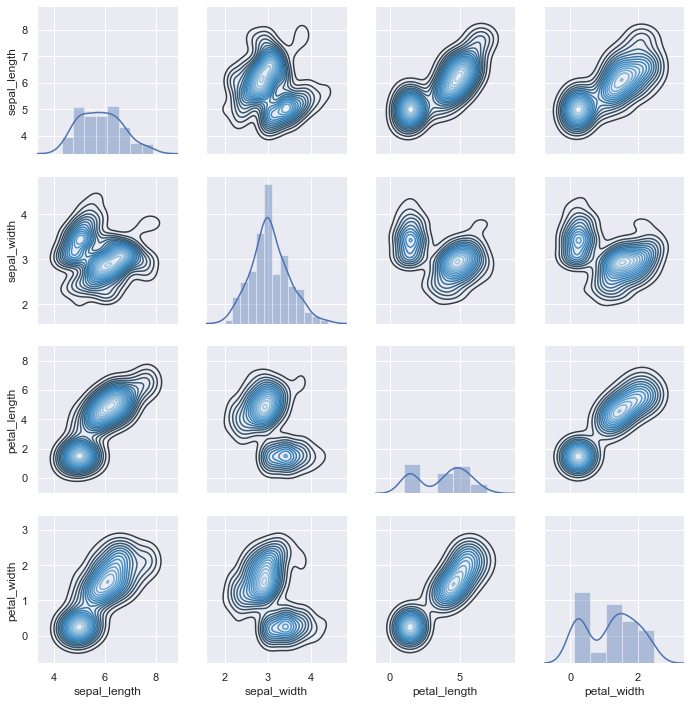

In [20]:
g=sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_offdiag(sns.kdeplot,cmap='Blues_d',n_levels=20)

# 高级分析

In [21]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
tips[tips['size']==1]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
82,10.07,1.83,Female,No,Thur,Lunch,1
111,7.25,1.00,Female,No,Sat,Dinner,1
222,8.58,1.92,Male,Yes,Fri,Lunch,1


## 线性回归

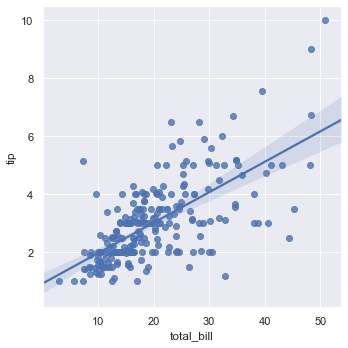

In [23]:
sns.lmplot(x='total_bill',y='tip',data=tips)

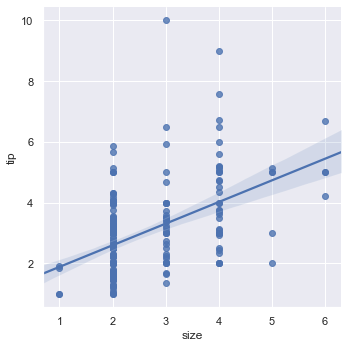

In [24]:
sns.lmplot(x='size',y='tip',data=tips)
#离散值会很尴尬

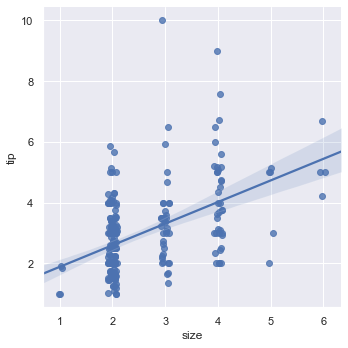

In [25]:
sns.lmplot(x='size',y='tip',data=tips,x_jitter=.08)

#防止看不到聚集的点

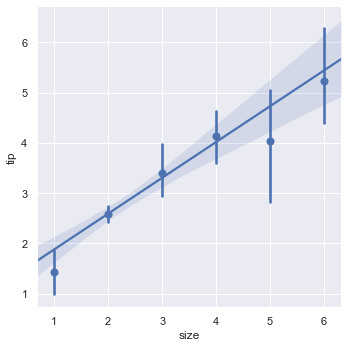

In [26]:
sns.lmplot(x='size',y='tip',data=tips,x_estimator=np.mean,ci=95)

## 拟合不同模型

In [27]:
anscombe=sns.load_dataset('anscombe')

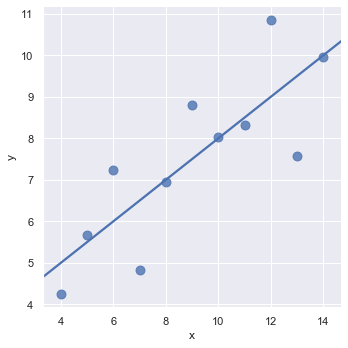

In [28]:
sns.lmplot(x='x',y='y',data=anscombe.query('dataset=="I"'),ci=None,scatter_kws={'s':80})

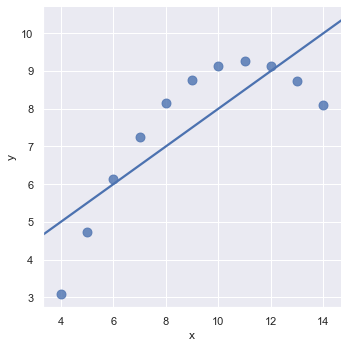

In [29]:
sns.lmplot(x='x',y='y',data=anscombe.query('dataset=="II"'),ci=None,scatter_kws={'s':80})

In [30]:
#上图不适合线性拟合，效果很差。所以用高阶拟合

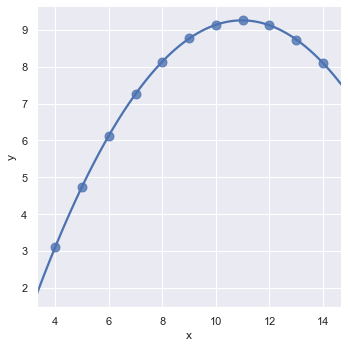

In [31]:
sns.lmplot(x='x',y='y',data=anscombe.query('dataset=="II"'),ci=None,order=2,scatter_kws={'s':80})

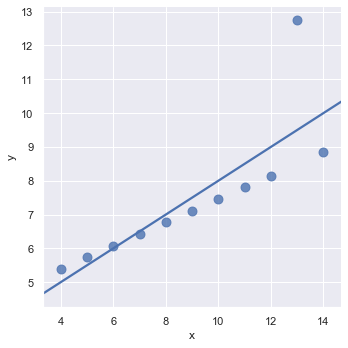

In [32]:
sns.lmplot(x='x',y='y',data=anscombe.query('dataset=="III"'),ci=None,scatter_kws={'s':80})

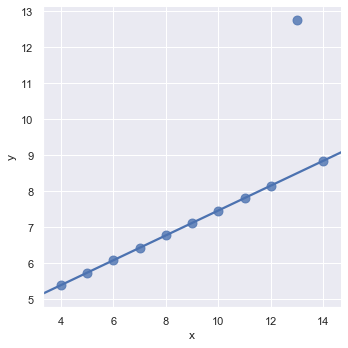

In [33]:
sns.lmplot(x='x',y='y',data=anscombe.query('dataset=="III"'),robust=True,ci=None,scatter_kws={'s':80})

In [34]:
#去除了异常值

In [35]:
tips['big_tip']=(tips.tip/tips.total_bill)>.15

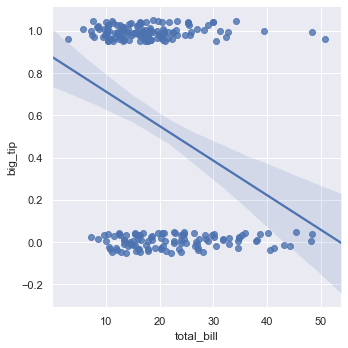

In [36]:
sns.lmplot(x='total_bill',y='big_tip',data=tips,y_jitter=.05)

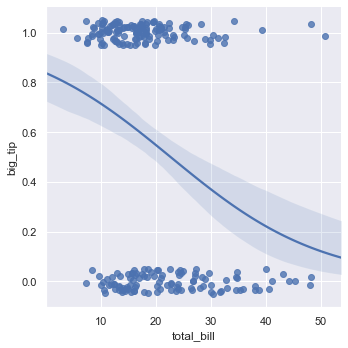

In [37]:
sns.lmplot(x='total_bill',y='big_tip',logistic=True,data=tips,y_jitter=.05)

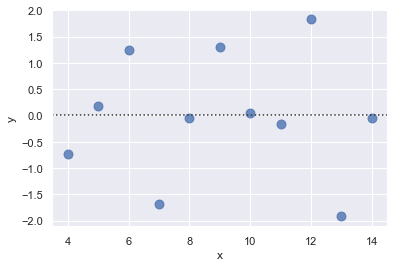

In [38]:
sns.residplot(x='x',y='y',data=anscombe.query('dataset=="I"'),scatter_kws={'s':80})

## 变量间条件关系

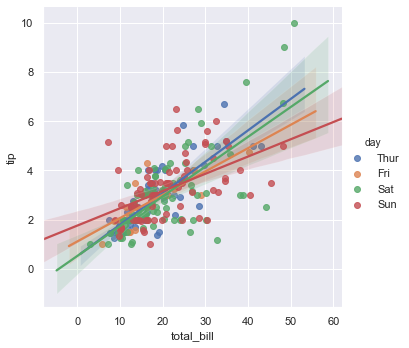

In [39]:
sns.lmplot(x='total_bill',y='tip',hue='day',data=tips)

#hue做分组

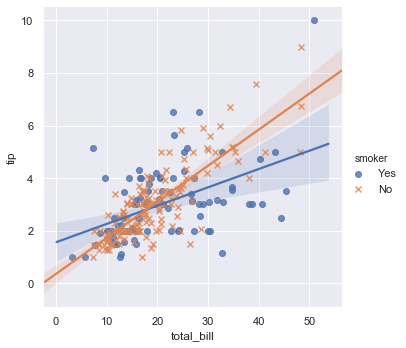

In [40]:
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=tips,markers=['o','x'])

In [41]:
#hue的对象必须是离散的

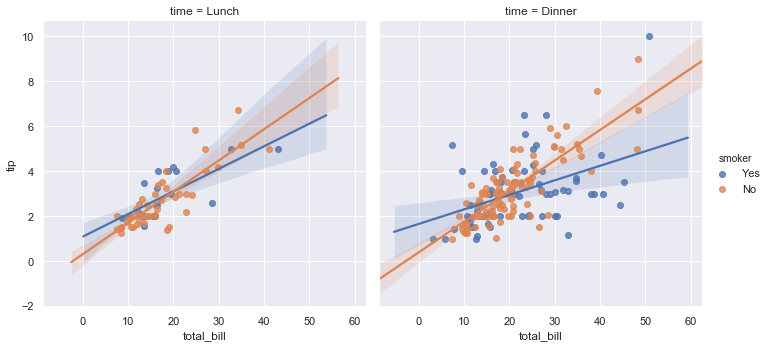

In [42]:
sns.lmplot(x='total_bill',y='tip',hue='smoker',col='time',data=tips)

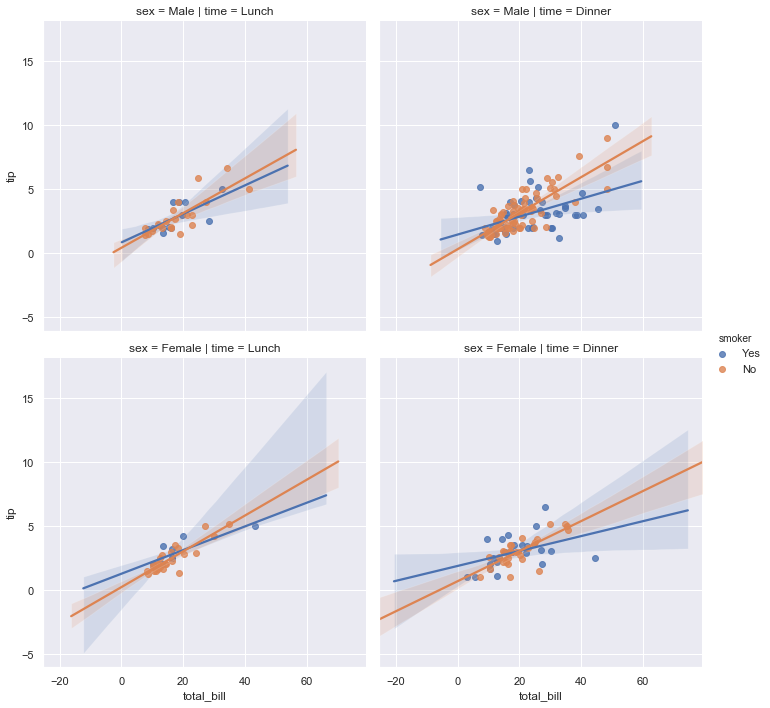

In [43]:
sns.lmplot(x='total_bill',y='tip',hue='smoker',col='time',row='sex',data=tips)

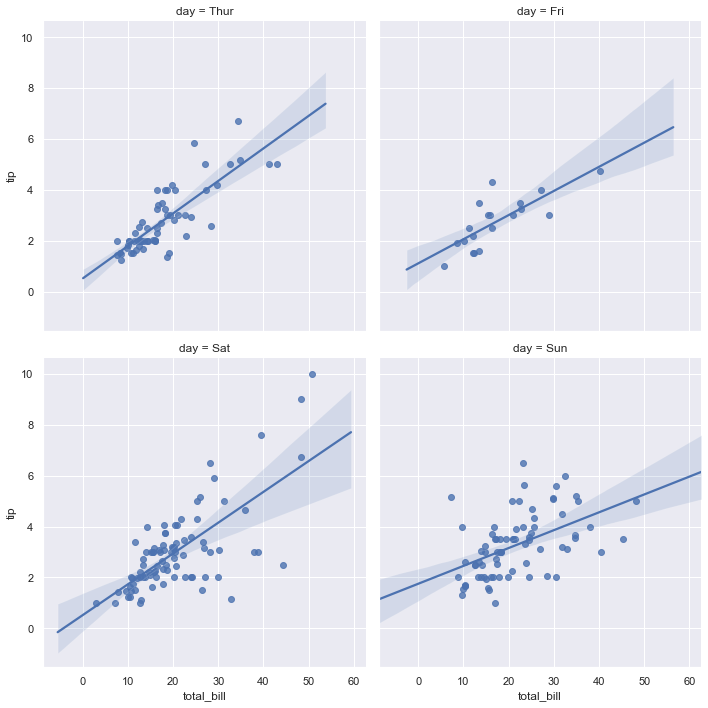

In [44]:
sns.lmplot(x='total_bill',y='tip',col='day',data=tips,col_wrap=2)

#本来一行有四

In [45]:
np.random.seed(2017)
titanic=sns.load_dataset('titanic')

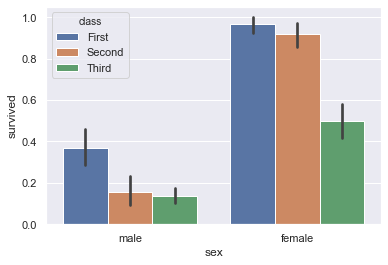

In [48]:
sns.barplot(x='sex',y='survived',hue='class',data=titanic)

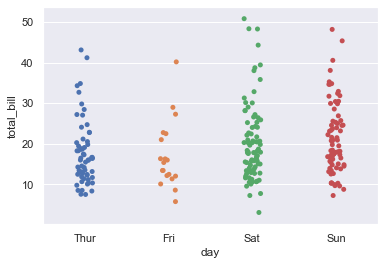

In [49]:
sns.stripplot(x='day',y='total_bill',data=tips)

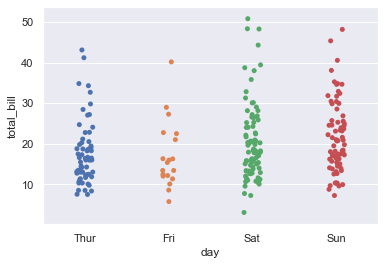

In [50]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

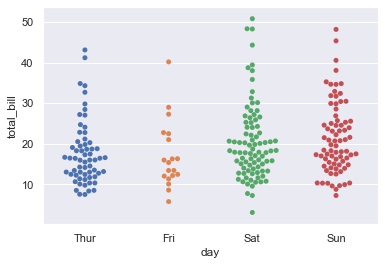

In [51]:
sns.swarmplot(x='day',y='total_bill',data=tips)

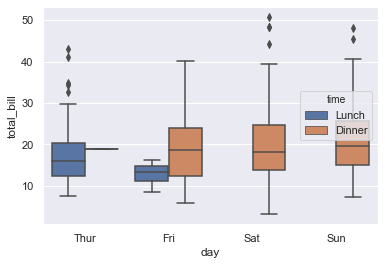

In [53]:
sns.boxplot(x='day',y='total_bill',hue='time',data=tips)

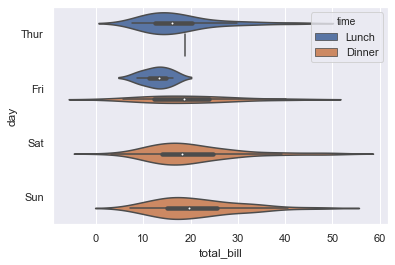

In [55]:
sns.violinplot(x='total_bill',y='day',hue='time',data=tips)

#白点是中位数，黑线是四分位

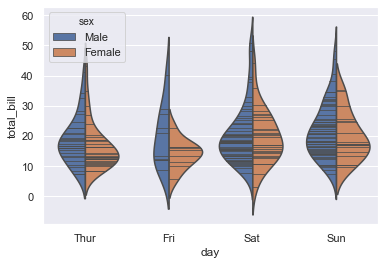

In [58]:
sns.violinplot(x='day',y='total_bill',hue='sex',split=True,inner='stick',data=tips)

#在这个地方，hue必须是两个取值的

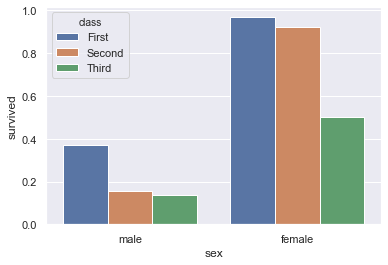

In [60]:
sns.barplot(x='sex',y='survived',hue='class',data=titanic,ci=None)

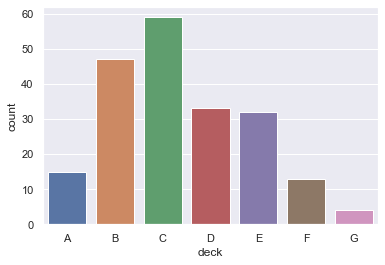

In [62]:
sns.countplot(x='deck',data=titanic) #对应pandas value_counts

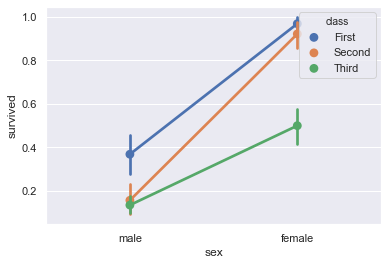

In [63]:
sns.pointplot(x='sex',y='survived',hue='class',data=titanic)

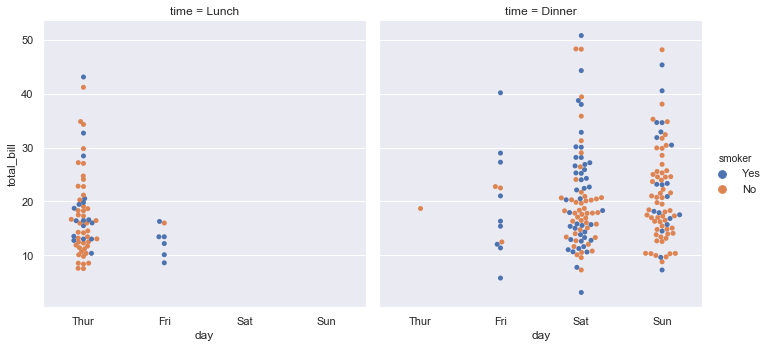

In [64]:
sns.factorplot(x='day',y='total_bill',hue='smoker',col='time',data=tips,kind='swarm')

In [65]:
PairGrid

NameError: name 'PairGrid' is not defined